In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
import torch
import torch.nn as nn


In [2]:
df = pd.read_csv('pet_adoption_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


Text(0.5, 1.0, 'Owner / Adoption')

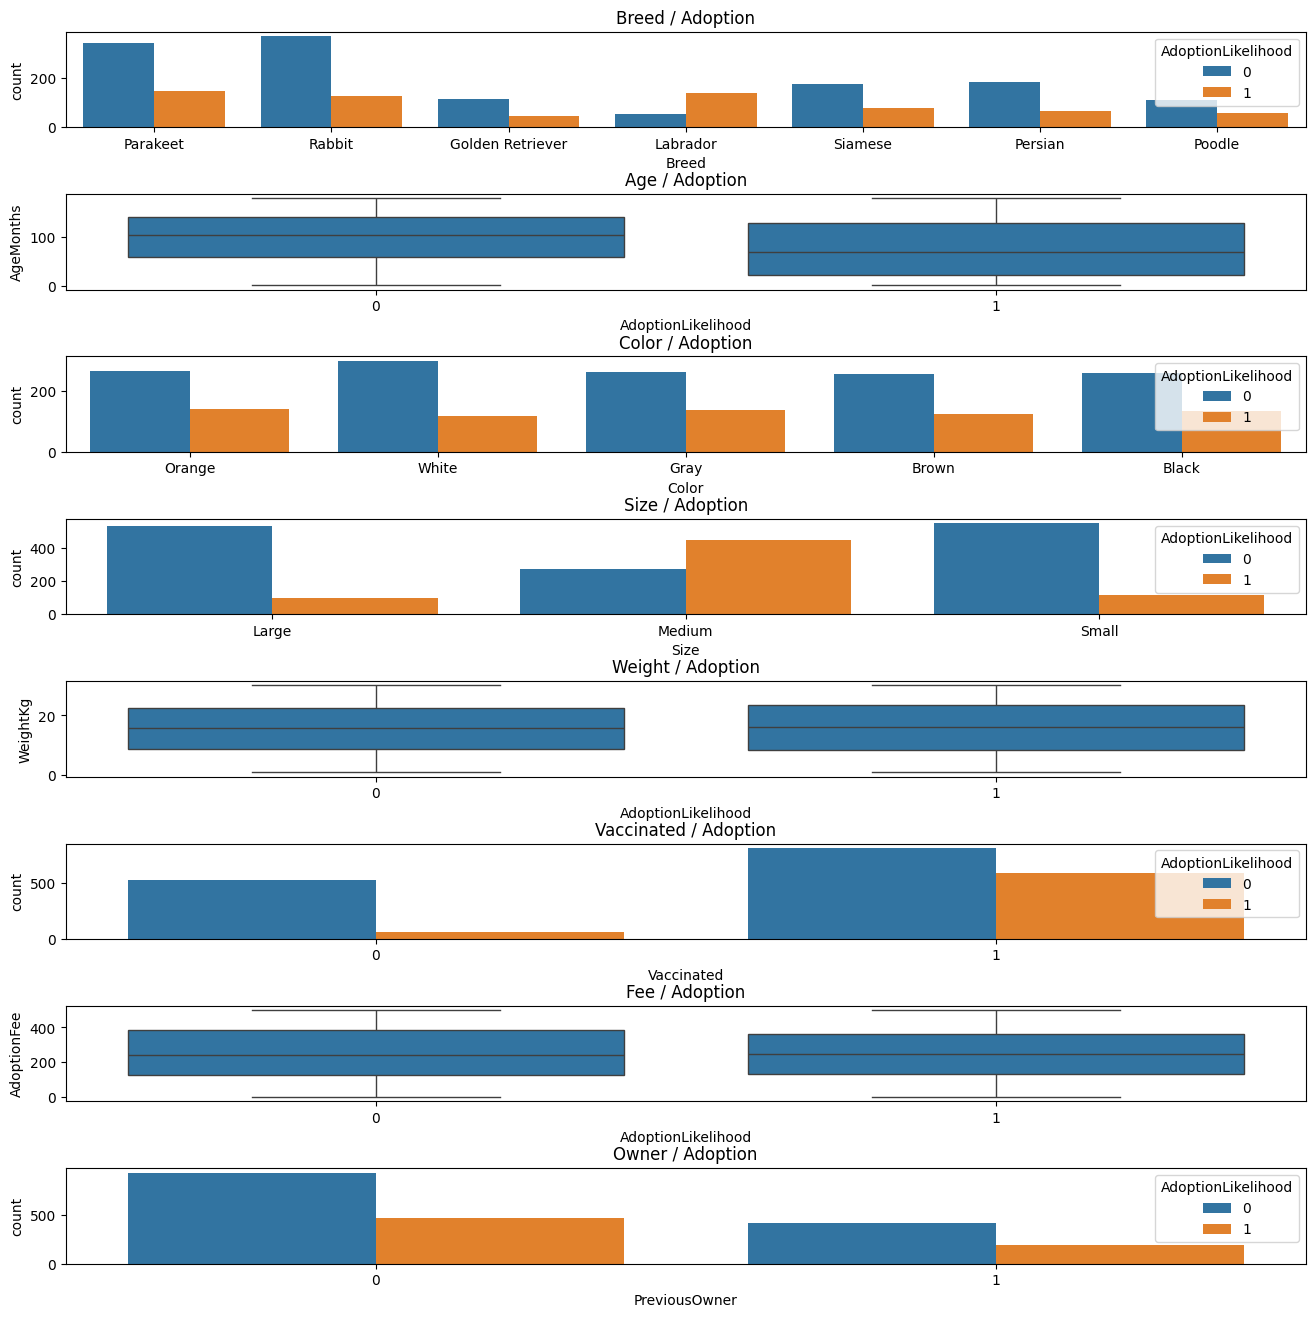

In [ ]:
fig, axes = plt.subplots(8,1, figsize = (16, 16))
fig.subplots_adjust(hspace = 0.7)

sns.countplot(df, x = 'Breed', hue = 'AdoptionLikelihood', ax = axes[0])
axes[0].set_title('Breed / Adoption')

sns.boxplot(df, y = 'AgeMonths', x = 'AdoptionLikelihood', ax = axes[1])
axes[1].set_title('Age / Adoption')

sns.countplot(df, x = 'Color', hue = 'AdoptionLikelihood', ax = axes[2])
axes[2].set_title('Color / Adoption')

sns.countplot(df, x = 'Size', hue = 'AdoptionLikelihood', ax = axes[3])
axes[3].set_title('Size / Adoption')

sns.boxplot(df, y = 'WeightKg', x = 'AdoptionLikelihood', ax = axes[4])
axes[4].set_title('Weight / Adoption')

sns.countplot(df, x = 'Vaccinated', hue = 'AdoptionLikelihood', ax = axes[5])
axes[5].set_title('Vaccinated / Adoption')

sns.boxplot(df, y = 'AdoptionFee', x = 'AdoptionLikelihood', ax = axes[6])
axes[6].set_title('Fee / Adoption')

sns.countplot(df, x = 'PreviousOwner', hue = 'AdoptionLikelihood', ax = axes[7])
axes[7].set_title('Owner / Adoption')

In [ ]:
df_eda = pd.get_dummies(df, columns=['PetType', 'Size', 'Color', 'Breed'], dtype = int)
df_eda.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_Bird,...,Color_Gray,Color_Orange,Color_White,Breed_Golden Retriever,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,...,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351,0.242651,...,0.199302,0.203787,0.209268,0.080717,0.096163,0.242651,0.125561,0.083209,0.245640,0.126059
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730,0.428792,...,0.399575,0.402913,0.406887,0.272469,0.294889,0.428792,0.331436,0.276266,0.430573,0.331998
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df = df.drop('PetID', axis = 1)


<Axes: >

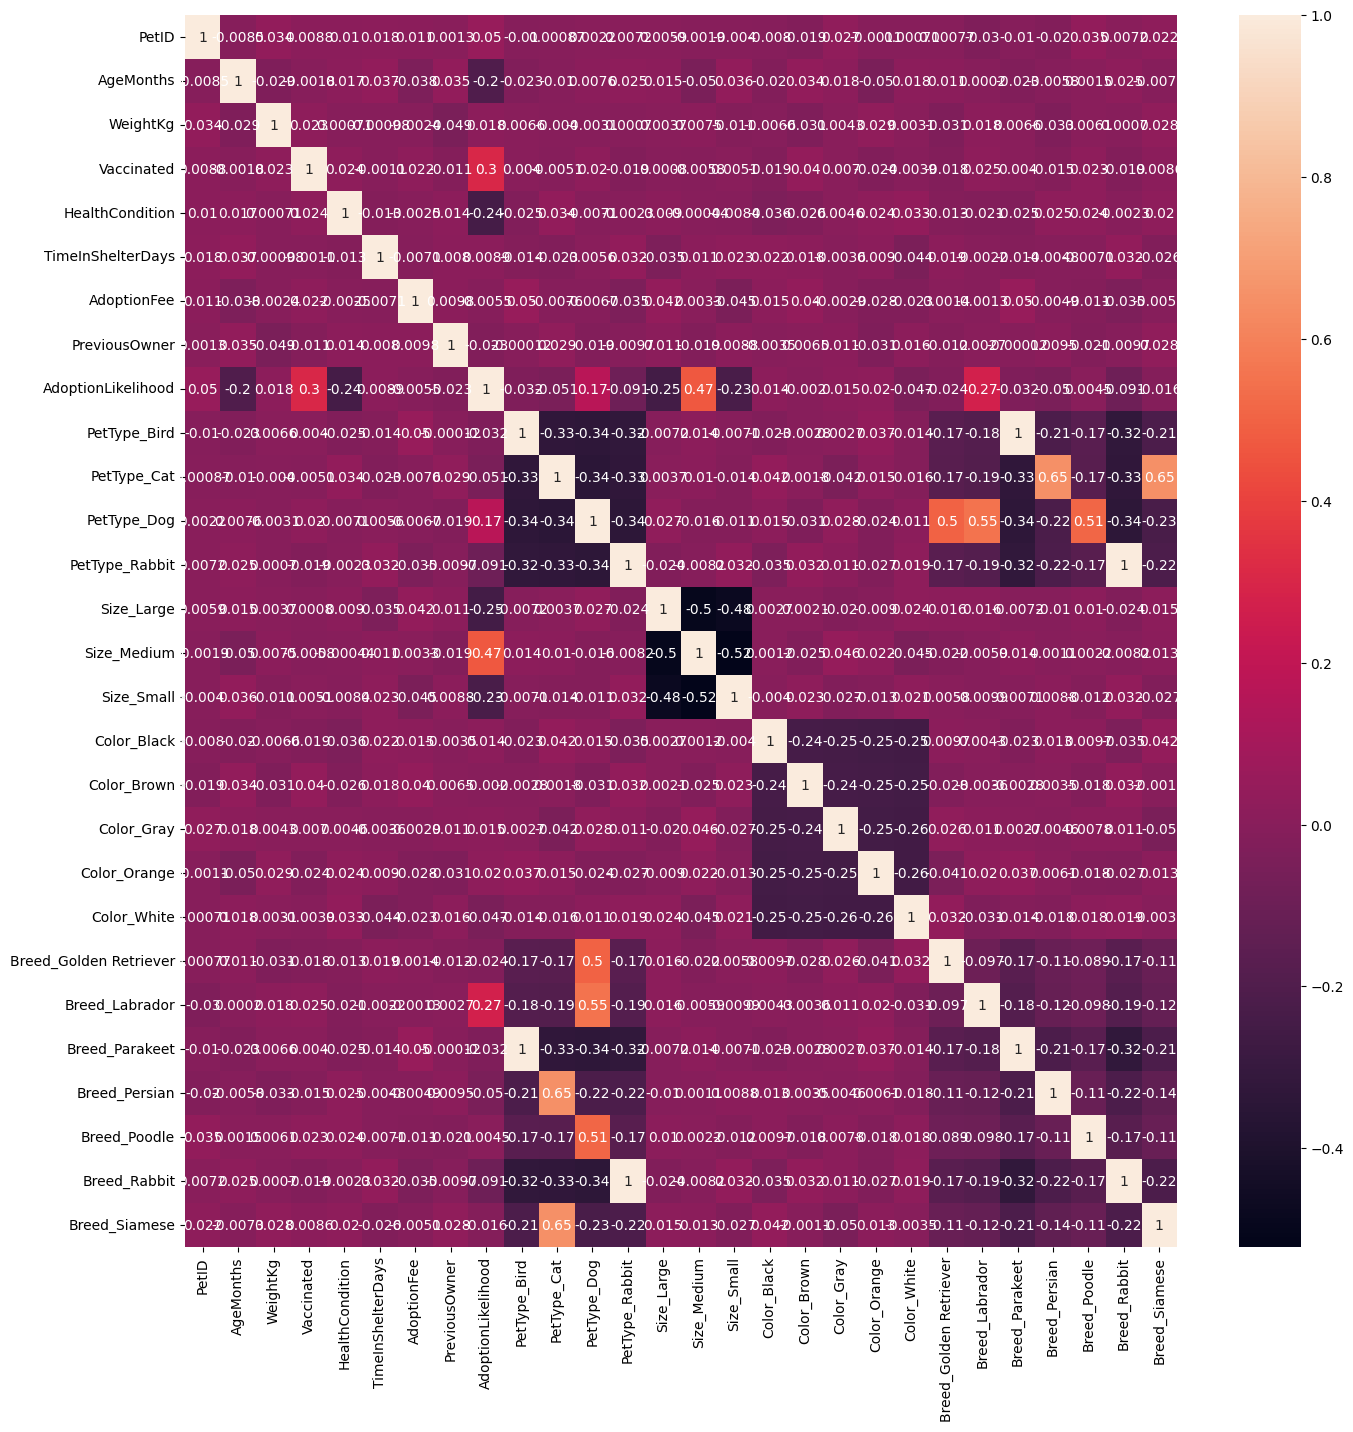

In [ ]:
corr_model = df_eda.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr_model, annot = True, )

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('AdoptionLikelihood', axis = 1), df['AdoptionLikelihood'], test_size = 0.2, random_state = 42, stratify = df['PetType'])

In [5]:
x_train = pd.get_dummies(x_train, columns=['PetType', 'Size', 'Color', 'Breed'], dtype = int)
x_test = pd.get_dummies(x_test, columns=['PetType', 'Size', 'Color', 'Breed'], dtype = int)

In [6]:
logistic_model = LogisticRegression()

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

logistic_model.fit(x_train_sc, y_train)

logistic_predict = logistic_model.predict(x_test_sc)
print(accuracy_score(y_test, logistic_predict))
print(log_loss(y_test, logistic_predict))

0.8805970149253731
4.30371980765578


In [53]:
svm_model = svm.SVC() # Tested with poly and sigmoid kernel - worse result

svm_model.fit(x_train_sc, y_train)

svm_predict = svm_model.predict(x_test_sc)
print(accuracy_score(y_test, svm_predict))
print(log_loss(y_test, svm_predict))

0.8731343283582089
4.572702295634266


In [319]:
# keras sequential is not appropriate for multiple tensor input/ output???
tf_model = keras.Sequential(
    [
        keras.layers.Dense(50, activation = 'relu', input_shape = (26,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation = 'relu'),
        #keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ]
)

tf_model.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.1), loss = keras.losses.MeanSquaredError(), metrics = ['Accuracy'])


In [320]:
tf_model.fit(x_train_sc, y_train, epochs = 20)
tf_model.evaluate(x_test_sc, y_test)

Epoch 1/20
51/51 [==============================] - 2s 2ms/step - loss: 0.4480 - Accuracy: 0.6436
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 0.2018 - Accuracy: 0.7421
Epoch 3/20
51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - Accuracy: 0.8312
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 0.1185 - Accuracy: 0.8654
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.1227 - Accuracy: 0.8511
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.1074 - Accuracy: 0.8910
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0987 - Accuracy: 0.8885
Epoch 8/20
51/51 [==============================] - 0s 2ms/step - loss: 0.1086 - Accuracy: 0.8841
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.1108 - Accuracy: 0.8791
Epoch 10/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0925 - Accuracy: 0.8935
Epoch 11/20
51/51 [

[0.08174391090869904, 0.9179104566574097]

In [80]:
tf_model.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.00001), loss = keras.losses.BinaryCrossentropy(), metrics = ['Accuracy'])
tf_model.fit(x_train_sc, y_train, epochs = 3)
tf_model.evaluate(x_test_sc, y_test)

Epoch 1/3
51/51 [==============================] - 1s 5ms/step - loss: 5.0744 - Accuracy: 0.6710
Epoch 2/3
51/51 [==============================] - 0s 5ms/step - loss: 5.0744 - Accuracy: 0.6710
Epoch 3/3
13/13 [==============================] - 0s 3ms/step - loss: 5.0265 - Accuracy: 0.6741


[5.0265374183654785, 0.6741293668746948]

# THE SECOND EXAMPLE

In [110]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
model_cancer_log = LogisticRegression()
model_cancer_log.fit(x_train, y_train)
cancer_log_predict = model_cancer_log.predict(x_test)
print(accuracy_score(y_test, cancer_log_predict))
print(log_loss(y_test, cancer_log_predict))

0.9824561403508771
0.632344796300301


In [23]:
model_cancer_svm = svm.SVC()
model_cancer_svm.fit(x_train, y_train)
predict_cancer_svm = model_cancer_svm.predict(x_test)
print(accuracy_score(y_test, predict_cancer_svm))
print(log_loss(y_test, predict_cancer_svm))


0.9824561403508771
0.632344796300301


In [308]:
model_cancer_keras = keras.Sequential(
    [
        keras.layers.Dense(50, activation = 'relu', input_shape = (30,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ]
)
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate= 0.01, decay_steps = 1000, decay_rate = 0.00001)
model_cancer_keras.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.1), loss = 'MSE', metrics = ['accuracy'])
model_cancer_keras.fit(x_train, y_train, epochs = 20)
model_cancer_keras.evaluate(x_test, y_test)

# Less than 50 neurons / 3 layers increases error and reduces accuracy, more reduces error and increases accuracy for training set, but not always for test set
# Sometimes resulted in loss of 9.6 and accuracy 0.37
# For 3 Layers with 50-30-20 neurons loss if 0.27 and accuracy is 0.93 or test, but for training loss 0.03 and accuracy = 0.986
# Sigmoid or Relu did not show some special difference
# For MSE loss is 0.03 and accuracy is 0.96 for test, and loss 0.005 and 1.00 for train (MSE espesiaaly good at error reduce in test set)
# Dropout increase loss and reduce accuracy. For MSE error seems like effect is stronger. Higher point / more layers -> stronger effect
# BatchNormaliztion - Significantly increses loss and reduces accuracy in train set, less for test set. Stronger for Sigmoid thn for Relu. More layers influences train set but not test
# Just one normalization Layer permitted increase learning rate 100 times without loosing in accuracy too much!!!
# Kernel_initalizers: he_normal -> Reduce accuracy of test model without influence a lot taining set error and accuracy? glorot_uniform -> didnot find differences
# Regularizers: increases error. L1 increaces more than L2. More regularizers - more error increace



Epoch 1/20
15/15 [==============================] - 4s 5ms/step - loss: 1.1619 - accuracy: 0.6286
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.2685 - accuracy: 0.7143
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1483 - accuracy: 0.7934
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.8725
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1360 - accuracy: 0.8374
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.8725
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1026 - accuracy: 0.8879
Epoch 8/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0977 - accuracy: 0.8967
Epoch 9/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0902 - accuracy: 0.9099
Epoch 10/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9253
Epoch 11/20
15/15 [

[0.06812984496355057, 0.9561403393745422]

In [36]:

# Tnsor creation from arrays
#batch_size = 100
x_train_tensor = torch.tensor(x_train_sc, dtype= float)
y_train_tensor = torch.tensor(y_train.values, dtype= float)
x_test_tensor = torch.tensor(x_test_sc, dtype= float)
y_test_tensor = torch.tensor(y_test.values, dtype= float)
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor)

# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle = True)


In [33]:

# Model definition
class NeuralNet(nn.Module):
    def __init__(self, input_size = 26, hidden_size = 50, output_size = 1):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.layer_3(out)
        out = self.sigmoid(out)

        return out

In [38]:
epochs = 3
learning_rate = 0.001
torch_model = NeuralNet()

# Loss function and Optimizer
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(torch_model.parameters(), lr = learning_rate)

for epoch in range(epochs):
    for i, (inputs, groups) in enumerate(train_loader):
        inputs = inputs.float()
        output = torch_model(inputs)
        groups = groups.view(-1, 1).float()
        loss = loss_fn(output, groups)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/3, Loss: 0.0015
Epoch 2/3, Loss: 0.1878
Epoch 3/3, Loss: 0.0284
